<a href="https://colab.research.google.com/github/OsandaWeerasinghe/JulieMwol/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [16]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [17]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

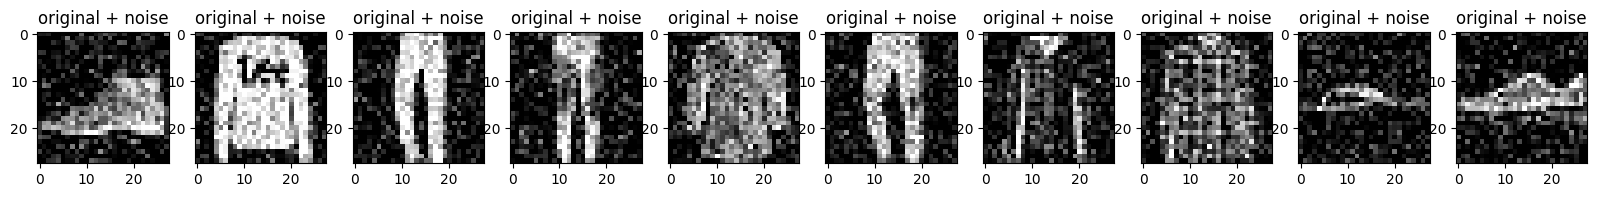

In [18]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

In [33]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2),
      #layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([

     # layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

In [34]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [35]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0178 - val_loss: 0.0103
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0092 - val_loss: 0.0086
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0082 - val_loss: 0.0081
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0079 - val_loss: 0.0077
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0076 - val_loss: 0.0076
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0075 - val_loss: 0.0076
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0074 - val_loss: 0.0073
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0072 - val_loss: 0.0071
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.007

In [26]:
autoencoder.encoder.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 14, 14, 8)         80        
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 16)          1168      
                                                                 
Total params: 1248 (4.88 KB)
Trainable params: 1248 (4.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
autoencoder.decoder.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose_10 (Conv2  (None, 14, 14, 16)        2320      
 DTranspose)                                                     
                                                                 
 conv2d_transpose_11 (Conv2  (None, 28, 28, 8)         1160      
 DTranspose)                                                     
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 1)         73        
                                                                 
Total params: 3553 (13.88 KB)
Trainable params: 3553 (13.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

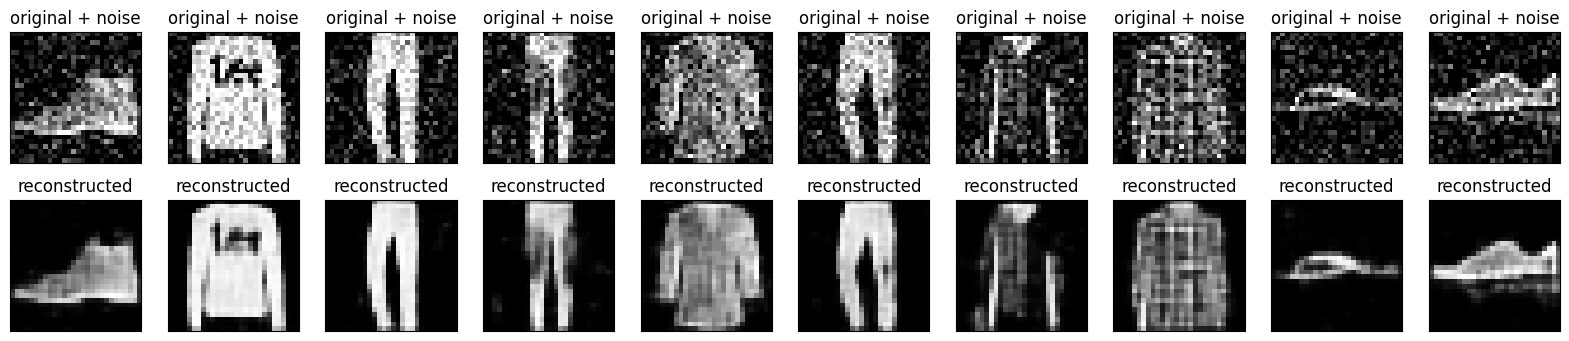

In [29]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()